# Demo - K-Nearest Neighbor Classifier
## In this demo, you will learn how to apply KNN algorithm in Python using scikit-learn library.



# Problem Statement
## Given the details of cars, we have to classify the origin of the cars.

In [1]:
#importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

## Dataset

### This datasel is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) In predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

### "The data concems city-cycle fuel consumption in milles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." Attribute Information:

⚫mpg: continuods

⚫cylinders: multi-valued discrete

displacement continuous

⚫horsepower continuous

• weight continuous

⚫acceleration: continuous

model year. multi-valued discrele

origin: multi-valued discrete

car name: string (unique for each instance)

# Data Analysis

In [4]:
Data1 = pd.read_csv("auto-mpg.csv")
Data1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


# .Checking Data

In [6]:
Data1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [7]:
Data1.shape

(398, 9)

In [14]:
Data1.describe().T #O Means Object

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [16]:
Data1.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# .Checking DataType

In [19]:
Data1.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

# .Testing For Null Values

In [22]:
Data1.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [24]:
# DataSet Has 6 Null Values In horsepower Column
Data1.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

# Treating Null Values

In [19]:
Data1["horsepower"]=Data1["horsepower"].fillna(Data1["horsepower"].mean())
# # Data1["horsepower"]=Data1["horsepower"].fillna(Data1["horsepower"].mean())
# Data1


In [21]:
Data1.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

# Predictor And Data

In [24]:
# print(*Data1.columns ,sep=" | ")

mpg | cylinders | displacement | horsepower | weight | acceleration | model year | origin | car name


In [22]:
# # Dropping Car Name As It Is Not Useful In Predicting The Origin
# feat = Data1.columns
# feat = feat.drop(["car name","origin"])

In [26]:
x=Data1.drop(columns=["car name", "origin"])
y=Data1.origin


In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: origin, dtype: int64

In [25]:
print(x.shape,y.shape)

(398, 7) (398,)


# Scaling The Data

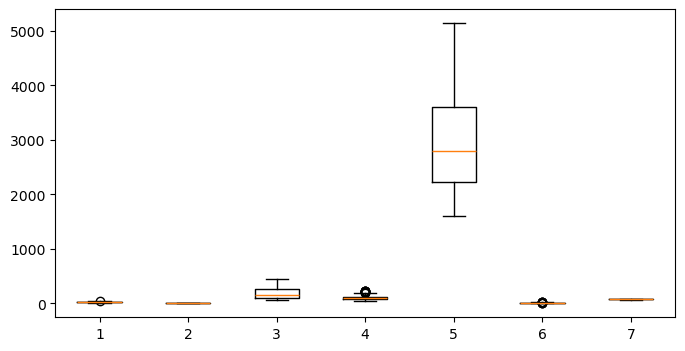

In [30]:
plt.figure(figsize=(8,4))
plt.boxplot(x)
plt.show()

### The Data Is Highly Inbalanced. Using MinMax Scaler To Scale The Data

In [33]:
scl = MinMaxScaler()
scl


MinMaxScaler()

In [35]:
X=scl.fit_transform(x)

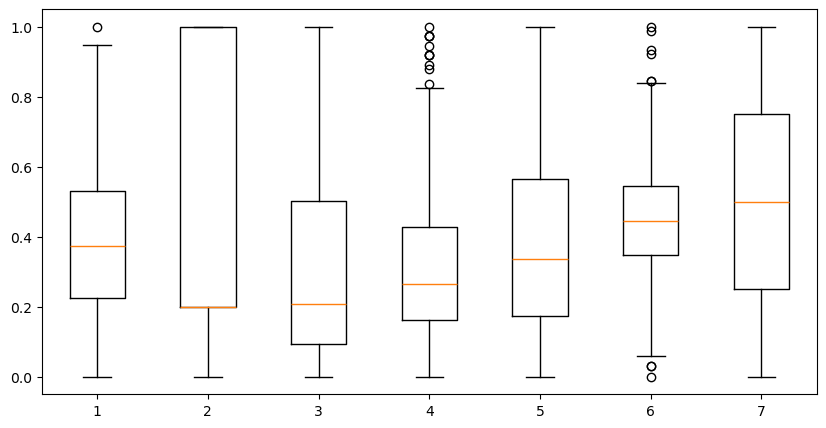

In [37]:
plt.figure(figsize=(10,5))
plt.boxplot(X)
plt.show()

# .Check DIstribution Of Target Variable

In [33]:
y.value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [39]:
Target_ratio = y.value_counts()
print(Target_ratio)

origin
1    249
3     79
2     70
Name: count, dtype: int64


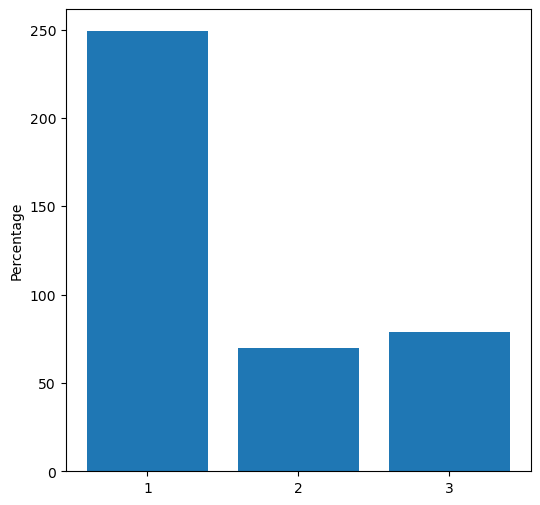

In [43]:
## Checking For Data UnBalanced
plt.figure(figsize=(6,6))
plt.bar(Target_ratio.index,Target_ratio)
plt.ylabel('Percentage')
plt.xticks(Target_ratio.index)
plt.show()

# .Train Test Split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0, test_size=0.3)

# K - Nearest Neighbor
## Key hyperparameters to be considered before applying the KNN algorithm:

### -->n_neighbors: Integer value to determine the number of neighbors to use by default it is 5.

### For more information about other hyperparameters see KNN section in the documentation here.

In [57]:
knn6= KNeighborsClassifier(n_neighbors=6)
knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train,y_train)
knn6.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=6)

# Accuracy Score

## .knn with 6 neighbors

In [79]:
pred = knn6.predict(X_test)
acc_gnb=accuracy_score(y_test,pred)
print("Accuracy Score",acc_gnb)

Accuracy Score 0.75


In [81]:
pred = knn3.predict(X_test)
acc_gnb=accuracy_score(y_test,pred)
print("Accuracy Score",acc_gnb)


Accuracy Score 0.7


# Multiclass ROC Curve
knn6_roc_auc and knn3_roc_auc to store the area under the ROC curve (AUC) for each class

lfpr6, ltpr6, lthresholds6 and lfpr3, ltpr3, lthresholds3 to store the false positive rates, true positive rates, and thresholds for each class

First for loop: Calculating ROC curves and AUC for each class

In this loop, you're iterating over each column of the dummy variables (dummy_y_test.columns). For each class, you're calculating the following:

knn6_roc_auc[i]: The area under the ROC curve (AUC) for the KNN model with 6 neighbors, using roc_auc_score from scikit-learn.
knn3_roc_auc[i]: The AUC for the KNN model with 3 neighbors.
lfpr6[i], ltpr6[i], lthresholds6[i]: The false positive rates, true positive rates, and thresholds for the ROC curve of the KNN model with 6 neighbors, using roc_curve from scikit-learn.
lfpr3[i], ltpr3[i], lthresholds3[i]: The same values for the KNN model with 3 neighbors.
Second for loop: Plotting ROC curves

In this loop, you're again iterating over each column of the dummy variables (dummy_y_test.columns). For each class, you're plotting the ROC curves for both KNN models using plt.plot. The plots are labeled with the class number and the AUC value for each model.

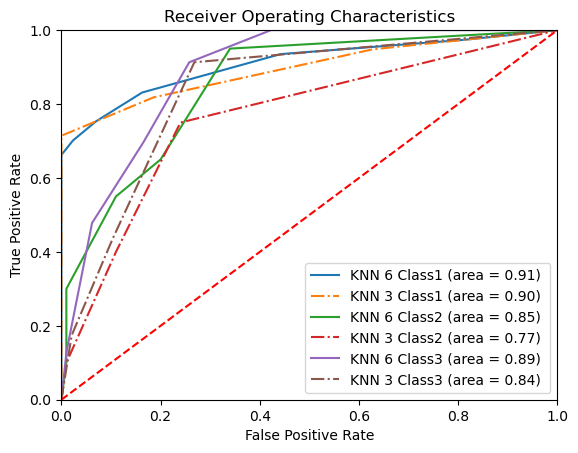

In [84]:
knn6_prob=knn6.predict_proba(X_test).T
knn3_prob=knn3.predict_proba(X_test).T

dummy_y_test=pd.get_dummies(y_test)

knn6_roc_auc=dict()
lfpr6=dict()
ltpr6=dict()
lthresholds6=dict()

knn3_roc_auc=dict()
lfpr3=dict()
ltpr3=dict()
lthresholds3=dict()


for i in dummy_y_test.columns:
    knn6_roc_auc[i]=          roc_auc_score(dummy_y_test[i],knn6_prob[i-1])
    knn3_roc_auc[i]=          roc_auc_score(dummy_y_test[i],knn3_prob[i-1])
    lfpr6[i],ltpr6[i],lthresholds6[i] = roc_curve(dummy_y_test[i],knn6_prob[i-1])
    lfpr3[i],ltpr3[i],lthresholds3[i] = roc_curve(dummy_y_test[i],knn3_prob[i-1])

for i in dummy_y_test.columns:
    plt.plot(lfpr6[i],ltpr6[i], label="KNN 6 Class"+str(i)+" (area = %0.2f)" %knn6_roc_auc[i])
    plt.plot(lfpr3[i],ltpr3[i],"-.", label="KNN 3 Class"+str(i)+" (area = %0.2f) " %knn3_roc_auc[i])

plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristics")
plt.legend(loc="lower right")
plt.show()

In [86]:
y_test

65     1
132    1
74     1
78     2
37     1
      ..
236    1
352    1
92     1
221    1
322    3
Name: origin, Length: 120, dtype: int64